In [28]:
import numpy as np
import matplotlib.pyplot as plt

def emc(x, m, b):
    # x are points, m is the slope, b is the y-intercept
    s = 0
    for point in x:
        y = m*point[0] + b
        s += (point[1] - y)**2
    return (1/len(x))*s

def gradient_descent(x, m, b, alpha):
    # x are points, m is the slope, b is the y-intercept, alpha is the learning rate
    n = len(x)
    dm = 0
    db = 0
    for point in x:
        dm += -2*(point[1] - m*point[0] - b)*point[0]
        db += -2*(point[1] - m*point[0] - b)
    m = (1/n)*alpha*dm
    b = (1/n)*alpha*db
    return m, b

x1 = (2,2)
x2 = (3,5)
x3 = (5,4)

X = np.array([x1,x2,x3])

r = emc(X, 1, 0)
print(r)

print('gradient_descent')
m_0, b_0 = -2, 5
for _ in range(15):
    m, b = gradient_descent(X, m_0, b_0, 0.01)
    print(f'gradient: {m:.4f}, {b:.4f}')
    m_0 = m_0 - m
    b_0 = b_0 - b
    print(f'{m_0:.4f}, {b_0:.4f}, error: {emc(X, m_0, b_0):.4f}')




1.6666666666666665
gradient_descent
gradient: -0.4333, -0.1067
-1.5667, 5.1067, error: 22.1158
gradient: -0.3164, -0.0756
-1.2502, 5.1823, error: 12.9636
gradient: -0.2312, -0.0530
-1.0190, 5.2353, error: 8.0972
gradient: -0.1691, -0.0366
-0.8499, 5.2719, error: 5.5082
gradient: -0.1238, -0.0246
-0.7260, 5.2965, error: 4.1295
gradient: -0.0908, -0.0158
-0.6352, 5.3123, error: 3.3938
gradient: -0.0668, -0.0094
-0.5684, 5.3217, error: 2.9999
gradient: -0.0492, -0.0048
-0.5192, 5.3265, error: 2.7876
gradient: -0.0364, -0.0014
-0.4828, 5.3279, error: 2.6718
gradient: -0.0271, 0.0010
-0.4557, 5.3269, error: 2.6073
gradient: -0.0203, 0.0028
-0.4354, 5.3240, error: 2.5701
gradient: -0.0154, 0.0041
-0.4200, 5.3199, error: 2.5474
gradient: -0.0117, 0.0051
-0.4083, 5.3149, error: 2.5325
gradient: -0.0091, 0.0057
-0.3992, 5.3091, error: 2.5216
gradient: -0.0072, 0.0062
-0.3920, 5.3029, error: 2.5130


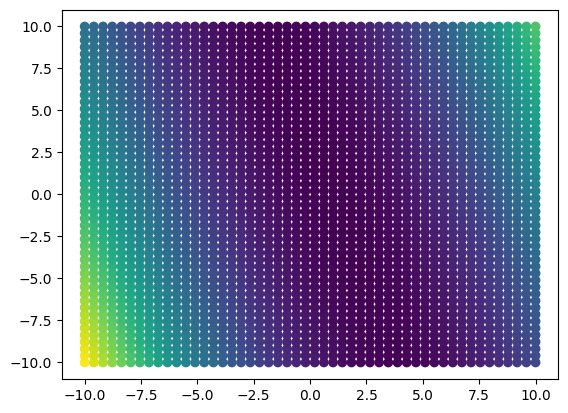

In [75]:
n = 50
x_range = np.linspace(-10, 10, n)
y_range = np.linspace(-10, 10, n)
x1 = (2,2)
x2 = (3,5)
x3 = (5,4)
X_points = np.array([x1,x2,x3])
X, Y = np.meshgrid(x_range, y_range)
plt.scatter(X, Y, c=emc(X_points,X,Y), cmap='viridis')
plt.show()

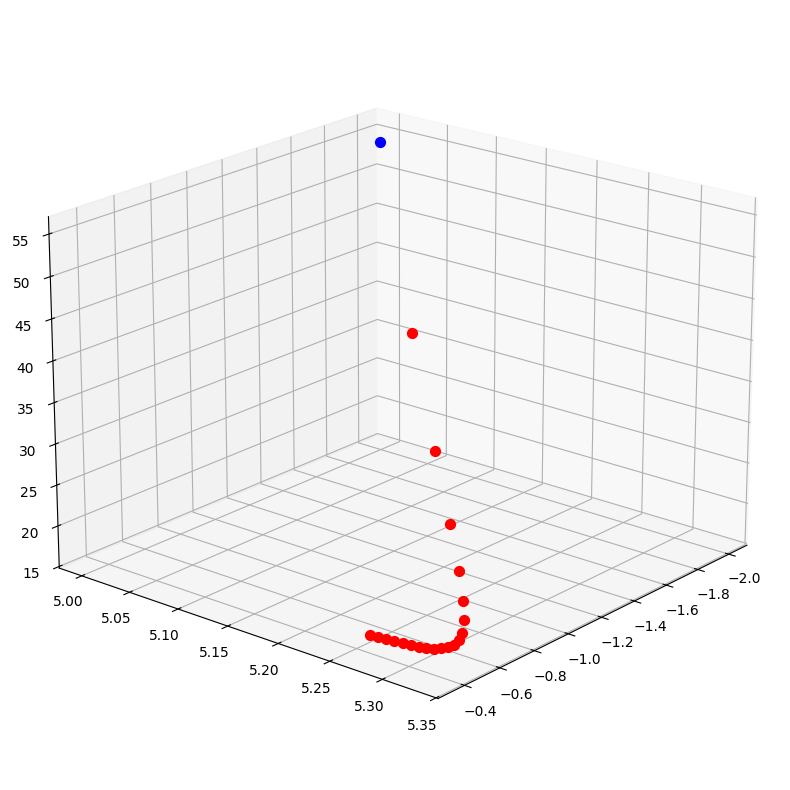

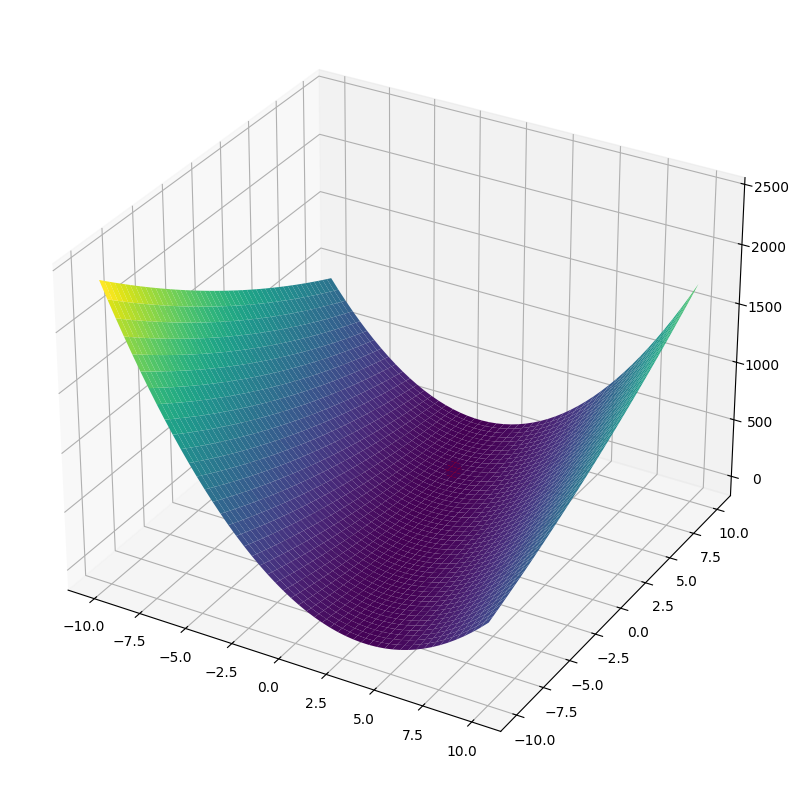

In [86]:
m_0, b_0 = -2, 5
# fig size 
fig = plt.figure(figsize=(10, 10))
ax  = plt.axes(projection='3d')
ax.scatter(m_0, b_0, emc(X_points, m_0, b_0)+15, c='b', s=50)
for _ in range(20):
    m, b = gradient_descent(X_points, m_0, b_0, 0.01)
    m_0 = m_0 - m
    b_0 = b_0 - b
    ax.scatter(m_0, b_0, emc(X_points, m_0, b_0)+15, c='r', s=50)
#ax.plot_wireframe(X, Y, emc(X_points,X,Y), color='black')
ax.view_init(20, 40)
plt.show()

fig = plt.figure(figsize=(10, 10))
bx  = plt.axes(projection='3d')
bx.scatter(m_0, b_0, emc(X_points, m_0, b_0)+15, c='b', s=100)
for _ in range(20):
    m, b = gradient_descent(X_points, m_0, b_0, 0.01)
    m_0 = m_0 - m
    b_0 = b_0 - b
    bx.scatter(m_0, b_0, emc(X_points, m_0, b_0)+15, c='r', s=100)

bx.plot_surface(X, Y, emc(X_points,X,Y), cmap='viridis')
plt.show()